# CS5100 Final Project

Name: Jing Ye

Goal: This assignment will allow you to apply your knowledge of machine learning that you have aquired in this course on a real-world dataset of your choosing per the assignment specifications.

Complete the notebook and demonstrate your mastery of the topic.

## Prerequisites

In this section describe any packages that need to be installed or any additional setup that needs to take place before trying to run code.

### install the required package
pip install ucimlrepo 

## Problem

In this section, you will explain the problem you are trying to solve, the things you are trying to learn, and how you want to visualize the results.

`1. My goal is to identify the most significant factors aiding in the diagnosis of Pediatric Appendicitis. `

`2. I also aim to evaluate various Machine Learning models to predict diagnosis (appendicitis vs. no appendicitis), treatment approach (surgical vs. conservative), and condition severity (complicated vs. uncomplicated or no appendicitis). I am curious about which model is the most effective model for these predictions.`

`3. I plan to use a bar chart to illustrate the top five crucial factors in diagnosing Pediatric Appendicitis. Additionally, I will be employing learning performance charts to depict the performance of the different models. `

## Data

In this section you will describe the dataset (corpus) you are using. Explain who collected the data, how they did it, the manner in which it was stored, the way you accessed the data, what steps you will have to do to clean it, and so on. Provide any relavent details.

`The Regensburg Pediatric Appendicitis dataset was collected at Children's Hospital St. Hedwig in Regensburg, Germany, from 2016 to 2021, involving pediatric patients suspected of appendicitis. The data, which includes ultrasound images and tabular data such as laboratory tests, physical examinations, and expert ultrasonographic findings, were manually extracted and encompass three target variables: diagnosis, management, and severity. To use this dataset, one would need to access it via the UCI Machine Learning Repository, possibly requiring data cleaning steps such as handling missing values and standardizing formats for analysis (UCI Machine Learning Repository).`

## Cleaning the Data

Add the code to download/query you data. If your data is already downloaded, then load it into your program here. Then add the code to clean it.

### Step 1 | Basic Exploration

In [2]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
  
# fetch dataset 
regensburg_pediatric_appendicitis = fetch_ucirepo(id=938) 
  
# data (as pandas dataframes) 
X = regensburg_pediatric_appendicitis.data.features 
y = regensburg_pediatric_appendicitis.data.targets

# Combine features and targets into a single DataFrame
df = pd.concat([X, y], axis=1)

# Display the first 5 rows
df.head(5)

,Age,BMI,Sex,Height,Weight,Length_of_Stay,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_on_US,Appendix_Diameter,...,Bowel_Wall_Thickening,Conglomerate_of_Bowel_Loops,Ileus,Coprostasis,Meteorism,Enteritis,Gynecological_Findings,Management,Severity,Diagnosis
0,12.68,16.9,female,148.0,37.0,3.0,4.0,3.0,yes,7.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,conservative,uncomplicated,appendicitis
1,14.10,31.9,male,147.0,69.5,2.0,5.0,4.0,no,NaN,...,NaN,NaN,NaN,NaN,yes,NaN,NaN,conservative,uncomplicated,no appendicitis
2,14.14,23.3,female,163.0,62.0,4.0,5.0,3.0,no,NaN,...,NaN,NaN,NaN,NaN,yes,yes,NaN,conservative,uncomplicated,no appendicitis
3,16.37,20.6,female,165.0,56.0,3.0,7.0,6.0,no,NaN,...,NaN,NaN,NaN,NaN,NaN,yes,NaN,conservative,uncomplicated,no appendicitis
4,11.08,16.9,female,163.0,45.0,3.0,5.0,6.0,yes,7.0,...,NaN,NaN,NaN,NaN,NaN,yes,NaN,conservative,uncomplicated,appendicitis


In [3]:
# Print the number of rows and columns
rows, cols = df.shape
print(f"Number of Rows: {rows}\nNumber of Columns: {cols}")

# Print the sum of null values in each column
print(df.isnull().sum())

# Display DataFrame information
df.info()

Number of Rows: 782
Number of Columns: 56
Age                                   1
BMI                                  27
Sex                                   2
Height                               26
Weight                                3
Length_of_Stay                        4
Alvarado_Score                       52
Paedriatic_Appendicitis_Score        52
Appendix_on_US                        5
Appendix_Diameter                   284
Migratory_Pain                        9
Lower_Right_Abd_Pain                  8
Contralateral_Rebound_Tenderness     15
Coughing_Pain                        16
Nausea                                8
Loss_of_Appetite                     10
Body_Temperature                      7
WBC_Count                             6
Neutrophil_Percentage               103
Segmented_Neutrophils               728
Neutrophilia                         50
RBC_Count                            18
Hemoglobin                           18
RDW                                  2

### Step 2 | Define Imputation Rules and Preprocessor for Data Cleaning
After carefully reviewing the data content and their pattern, I believe imputing missing numerical values with 0 and categorical values with "missing" is an appropriate and straightforward approach.

In [4]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Define target columns
target_columns = ["Management", "Severity", "Diagnosis"]

def impute_missing_values(df):
    """Impute missing values in a DataFrame."""
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    object_cols = df.select_dtypes(include=['object']).columns.tolist()

    num_imputer = SimpleImputer(strategy='constant', fill_value=0)
    df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

    obj_imputer = SimpleImputer(strategy='constant', fill_value='missing')
    df[object_cols] = obj_imputer.fit_transform(df[object_cols])
    
    return df

def preprocess_features(df, target_columns):
    """Preprocess features using OneHotEncoding for categorical variables."""
    X = df.drop(target_columns, axis=1)
    
    categorical_features = X.select_dtypes(include=['object']).columns.tolist()

    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ], remainder='passthrough')

    X_transformed = preprocessor.fit_transform(X)
    return X_transformed, df[target_columns], preprocessor


## Learning Model

Initially, I also considered the Linear Regression model, but it seems it won't be suitable here since it's meant for continuous numerical outcomes. My target variables are categorical, so I removed the Linear Regression model from my notebook. The other models that I chose to experience are Random Forest, Decision Tree, KNN, and SVM.

In [5]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Process data
df_processed = impute_missing_values(df)
X_transformed, y, preprocessor = preprocess_features(df_processed, target_columns)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)


### Model 1 | Random Forest

In [6]:
model_rf = MultiOutputClassifier(RandomForestClassifier(n_jobs=-1, random_state=42))
model_rf.fit(X_train, y_train)

train_preds = model_rf.predict(X_train)
val_preds = model_rf.predict(X_test)

for i in range(y_train.shape[1]):
    print(f"Accuracy for target {target_columns[i]} - Train: {accuracy_score(y_train.iloc[:, i], train_preds[:, i]):.2f}, Validation: {accuracy_score(y_test.iloc[:, i], val_preds[:, i]):.2f}")

train_accuracy_rf = model_rf.score(X_train, y_train)
val_accuracy_rf = model_rf.score(X_test, y_test)

print("Training Accuracy:", train_accuracy_rf)
print("Validation Accuracy:", val_accuracy_rf)

Accuracy for target Management - Train: 1.00, Validation: 0.94
Accuracy for target Severity - Train: 1.00, Validation: 0.90
Accuracy for target Diagnosis - Train: 1.00, Validation: 0.96
Training Accuracy: 1.0
Validation Accuracy: 0.8343949044585988


### Model 2 | Decision Tree

In [7]:
model_dt = MultiOutputClassifier(DecisionTreeClassifier(random_state=42))
model_dt.fit(X_train, y_train)

train_preds = model_dt.predict(X_train)
val_preds = model_dt.predict(X_test)

for i in range(y_train.shape[1]):
    print(f"Accuracy for target {target_columns[i]} - Train: {accuracy_score(y_train.iloc[:, i], train_preds[:, i]):.2f}, Validation: {accuracy_score(y_test.iloc[:, i], val_preds[:, i]):.2f}")

train_accuracy_dt = model_dt.score(X_train, y_train)
val_accuracy_dt = model_dt.score(X_test, y_test)

print("Training Accuracy:", train_accuracy_dt)
print("Validation Accuracy:", val_accuracy_dt)

Accuracy for target Management - Train: 1.00, Validation: 0.87
Accuracy for target Severity - Train: 1.00, Validation: 0.87
Accuracy for target Diagnosis - Train: 1.00, Validation: 0.93
Training Accuracy: 1.0
Validation Accuracy: 0.7070063694267515


### Model 3 |  K Nearest Neighbors

In [8]:
model_knn = MultiOutputClassifier(KNeighborsClassifier(n_neighbors=5))
model_knn.fit(X_train, y_train)

train_preds = model_knn.predict(X_train)
val_preds = model_knn.predict(X_test)

for i in range(y_train.shape[1]):
    print(f"Accuracy for target {target_columns[i]} - Train: {accuracy_score(y_train.iloc[:, i], train_preds[:, i]):.2f}, Validation: {accuracy_score(y_test.iloc[:, i], val_preds[:, i]):.2f}")

train_accuracy_knn = model_knn.score(X_train, y_train)
val_accuracy_knn = model_knn.score(X_test, y_test)

print("Training Accuracy:", train_accuracy_knn)
print("Validation Accuracy:", val_accuracy_knn)

Accuracy for target Management - Train: 0.76, Validation: 0.66
Accuracy for target Severity - Train: 0.91, Validation: 0.85
Accuracy for target Diagnosis - Train: 0.80, Validation: 0.69
Training Accuracy: 0.616
Validation Accuracy: 0.39490445859872614


### Model 4 | Support Vector Machines

In [9]:
model_svm = MultiOutputClassifier(SVC(kernel='linear'))
model_svm.fit(X_train, y_train)

train_preds = model_svm.predict(X_train)
val_preds = model_svm.predict(X_test)

for i in range(y_train.shape[1]):
    print(f"Accuracy for target {target_columns[i]} - Train: {accuracy_score(y_train.iloc[:, i], train_preds[:, i]):.2f}, Validation: {accuracy_score(y_test.iloc[:, i], val_preds[:, i]):.2f}")

train_accuracy_svm = model_svm.score(X_train, y_train)
val_accuracy_svm = model_svm.score(X_test, y_test)

print("Training Accuracy:", train_accuracy_svm)
print("Validation Accuracy:", val_accuracy_svm)

Accuracy for target Management - Train: 0.98, Validation: 0.90
Accuracy for target Severity - Train: 0.98, Validation: 0.89
Accuracy for target Diagnosis - Train: 0.96, Validation: 0.88
Training Accuracy: 0.92
Validation Accuracy: 0.7070063694267515


## Tuning and Feature Extraction

Add and describe code to perform Hyperparameter Tuning and Feature Extraction or PCA.

`Since the Random Forest model has the best performance in making predictions on the given dataset, I decided to use this model. Next, let's try to perform the Hyperparameter Tuning on it.`

In [12]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'estimator__n_estimators': [50, 100, 150],
    'estimator__max_depth': [5, 10, 20],
    'estimator__min_samples_split': [4, 10, 20],
    'estimator__min_samples_leaf': [2, 4, 6]
}

# Initialize the Classifier
model_rf_ht = MultiOutputClassifier(RandomForestClassifier(n_jobs=-1, random_state=42))

# Set up the GridSearchCV object
grid_search = GridSearchCV(model_rf_ht, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions with the best model
train_preds = best_model.predict(X_train)
val_preds = best_model.predict(X_test)

# Evaluate the best model
for i, target in enumerate(target_columns):
    train_accuracy = accuracy_score(y_train.iloc[:, i], train_preds[:, i])
    val_accuracy = accuracy_score(y_test.iloc[:, i], val_preds[:, i])
    print(f"Accuracy for target {target} - Train: {train_accuracy:.2f}, Validation: {val_accuracy:.2f}")

# Calculate overall accuracy for the training and validation sets
train_accuracy_rf_ht = best_model.score(X_train, y_train)
val_accuracy_rf_ht = best_model.score(X_test, y_test)

print("Training Accuracy:", train_accuracy_rf_ht)
print("Validation Accuracy:", val_accuracy_rf_ht)


Accuracy for target Management - Train: 0.97, Validation: 0.94
Accuracy for target Severity - Train: 0.99, Validation: 0.94
Accuracy for target Diagnosis - Train: 1.00, Validation: 0.94
Training Accuracy: 0.9616
Validation Accuracy: 0.8407643312101911


### After performing the Hyperparameter Tuning on the Random Forest model, the validation accuracy improved from 0.83 to 0.84.

## Visuals

Below, generate the visuals that will explain the results you are getting and show what you hoped to learn from the data.

### 1 | Model Performance Against Each Other
`The graph below displays a comparison of model performances. 
As you can see, the Random Forest has the best performance. It might be because of its ability to build multiple decision trees and average their results, which reduces overfitting and improves generalization. 
On the other hand, KNN has the lowest performance. It might result from its sensitivity to the data scale and irrelevant features, which can significantly affect its distance-based classification, especially in a high-dimensional space (multiple features).`

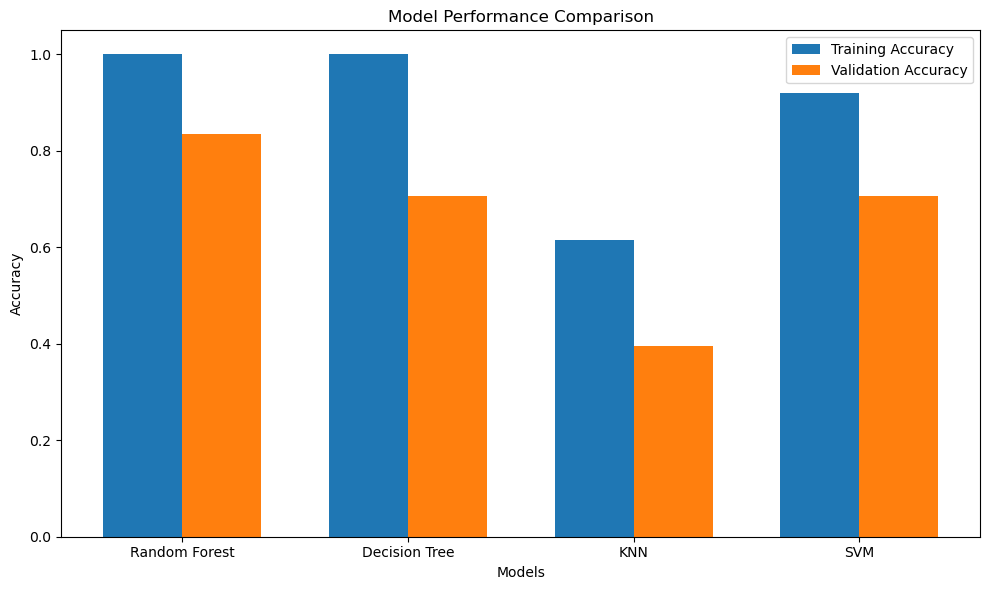

In [13]:
import matplotlib.pyplot as plt

# Model names
model_names = ['Random Forest', 'Decision Tree', 'KNN', 'SVM']

# Model accuracies
train_accuracies = [train_accuracy_rf, train_accuracy_dt, train_accuracy_knn, train_accuracy_svm]
val_accuracies = [val_accuracy_rf, val_accuracy_dt, val_accuracy_knn, val_accuracy_svm]

# Set up the bar
bar_width = 0.35
index = range(len(model_names))
plt.figure(figsize=(10, 6))
plt.bar(index, train_accuracies, bar_width, label='Training Accuracy')
plt.bar([i+bar_width for i in index], val_accuracies, bar_width, label='Validation Accuracy')

# Labeling
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.xticks([i + bar_width/2 for i in index], model_names)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

### 2 | Top 5 Crucial Factors in Diagnosing Pediatric Appendicitis

`In addition to evaluate different models, I am also interested about the most significant factors aiding in the diagnosis of Pediatric Appendicitis. I use bar chart and pie chart to show the top important features.`

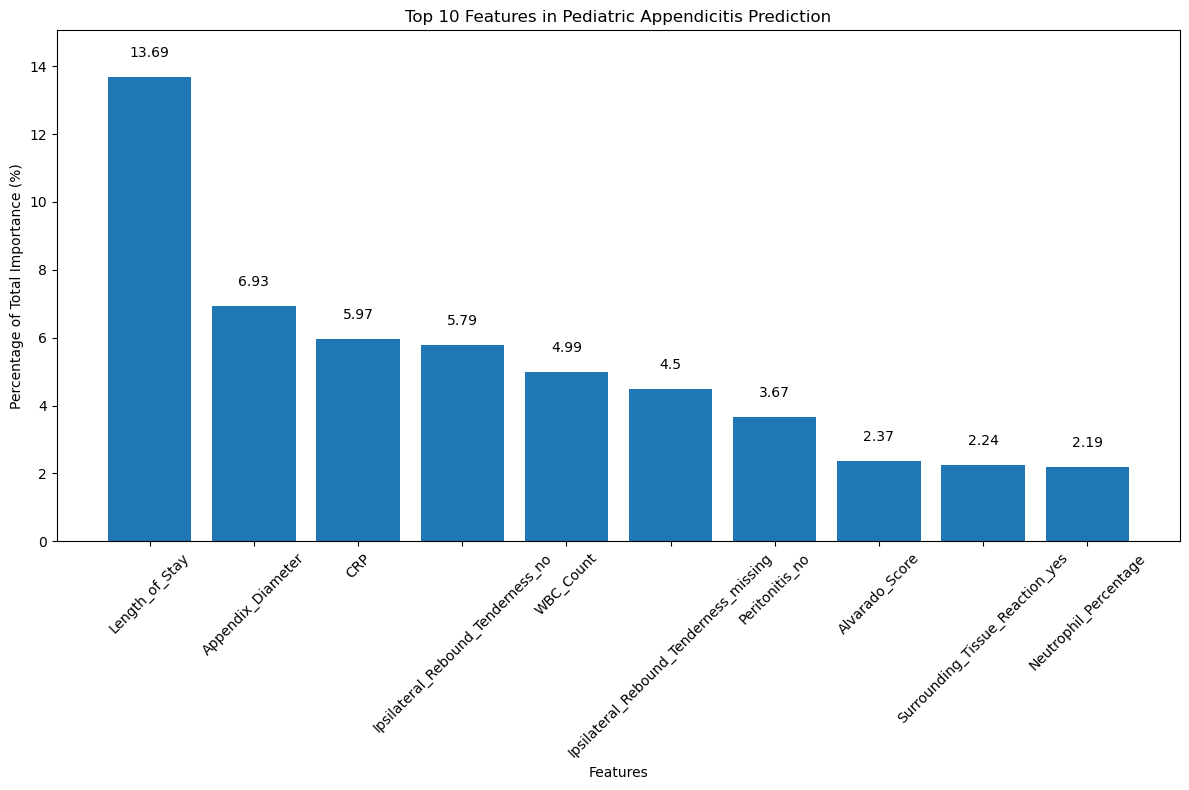

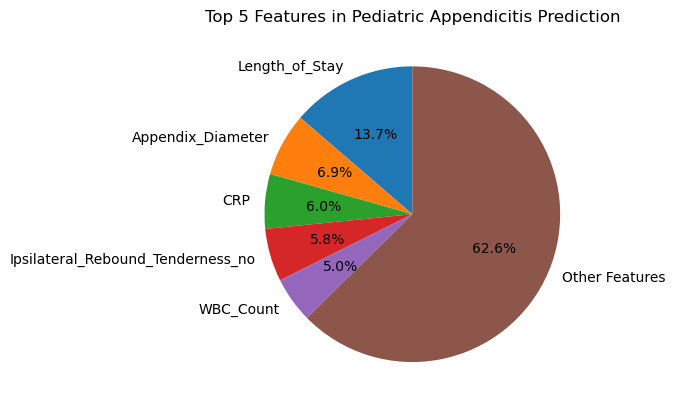

In [21]:
import numpy as np

# Get all features
categorical_features = preprocessor.named_transformers_['cat'].get_feature_names_out()
numerical_features = df.drop(target_columns, axis=1).select_dtypes(exclude=['object']).columns.tolist()
all_features = np.concatenate([categorical_features, numerical_features], axis=0)

# construct a DataFrame for the transformed 'X_train'
X_train_df = pd.DataFrame(X_train.toarray(), columns=all_features)
feature_names = X_train_df.columns

# Calculate feature importances using the best_model
feature_importances = np.mean([est.feature_importances_ for est in best_model.estimators_], axis=0)

# Create a Series with feature importances
importances = pd.Series(feature_importances, index=feature_names)

# Sort the features by importance
sorted_importances = importances.sort_values(ascending=False)

# Plot a bar chart for the top 10 features
top10_features = sorted_importances.head(10)
total_importance = sorted_importances.sum()
top10_features_percentage = (top10_features / total_importance) * 100
plt.figure(figsize=(12, 8))
bars = plt.bar(top10_features_percentage.index, top10_features_percentage.values)
plt.title('Top 10 Features in Pediatric Appendicitis Prediction')
plt.ylabel('Percentage of Total Importance (%)')
plt.xlabel('Features')
plt.xticks(rotation=45)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(yval, 2), ha='center', va='bottom')
upper_limit = top10_features_percentage.max() * 1.1
plt.ylim(0, upper_limit)
plt.tight_layout()
plt.show()


# Plot a pie chart for the top 5 features with 'Other Features'
top5_features = sorted_importances.head(5)
other_features_importance = pd.Series(sorted_importances[5:].sum(), index=['Other Features'])
top5_and_other = pd.concat([top5_features, other_features_importance])
fig, ax = plt.subplots()
top5_and_other.plot.pie(autopct='%1.1f%%', ax=ax, startangle=90)
ax.set_ylabel('')
ax.set_title('Top 5 Features in Pediatric Appendicitis Prediction');

## Refection

1. What issues did you encounter when aquiring and cleaning the data?

`I encountered some type errors when imputing the data, some complaints about cannot convert string to float. I also encountered some kind of shape error caused by the OneHotEncoder, complaining that the number of keys does not match. I spent a lot of time on debugging, I tried to print out the DataFrame, shapes, keys, etc., and finally resolved the issue. `


2. What features did you use in your final model and why were others excluded?

`I used all the features in my model since the information in the dataset is medical records and the features have already been manually selected by the doctors, all the features left in the dataset are important.`

3. Which ML methods did you use and why? Which performed best before you started tuning? Did things change after tuning?

`I used the Random Forest model as the ultimate result. The Random Forest model has the best performance. It might be because of its ability to build multiple decision trees and average their results, which reduces overfitting and improves generalization. The performance after tuning changed from 0.83 to 0.84 for the accuracy.`

4. What was your accuracy before and then after cross validation?

`For the Random Forest model, the accuracy was 100% before cross validation, after validation the accuracy changed to 83%.`

5. What was the most challenging part of this project?

`I think data cleaning is the most challenging part. I encountered so many errors when I tried to train and predict through the model, and all was because the data was not ready yet. Although cleaning data took me a lot of time and the debugging process was tedious, I found the process very interesting. I would suggest to keep this project for future semesters.`